In [45]:
import pandas as pd 
import json
import re
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import seaborn as sns

In [46]:
# 讀取資料 以_id 設為col
df = pd.read_csv('./omdb_all_primary.csv')
df

,_id,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,totalSeasons,Response
0,5fb14937f686757a60e6dc67,The Boys,2019–,TV-MA,26 Jul 2019,60 min,"Action, Comedy, Crime, Sci-Fi",NaN,Eric Kripke,"Karl Urban, Jack Quaid, Antony Starr, Erin Mor...",...,Nominated for 1 Primetime Emmy. Another 1 win ...,https://m.media-amazon.com/images/M/MV5BNGEyOG...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,8.7,"207,800",tt1190634,series,3,True
1,5fb14937f686757a60e6dc68,Schitt's Creek,2015–2020,TV-14,11 Feb 2015,22 min,Comedy,NaN,"Dan Levy, Eugene Levy","Eugene Levy, Catherine O'Hara, Dan Levy, Annie...",...,Won 9 Primetime Emmys. Another 59 wins & 122 n...,https://m.media-amazon.com/images/M/MV5BNWQ1Zm...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,8.5,"49,018",tt3526078,series,6,True
2,5fb14937f686757a60e6dc69,Emily in Paris,2020–,TV-MA,02 Oct 2020,30 min,"Comedy, Drama, Romance",NaN,Darren Star,"Lily Collins, Philippine Leroy-Beaulieu, Ashle...",...,NaN,https://m.media-amazon.com/images/M/MV5BYTFjZj...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,7.2,"28,629",tt8962124,series,true,True
3,5fb14937f686757a60e6dc6a,This Is Us,2016–,TV-14,20 Sep 2016,45 min,"Comedy, Drama, Romance",NaN,Dan Fogelman,"Milo Ventimiglia, Mandy Moore, Sterling K. Bro...",...,Won 1 Golden Globe. Another 49 wins & 181 nomi...,https://m.media-amazon.com/images/M/MV5BYjNlOW...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,8.7,"99,283",tt5555260,series,5,True
4,5fb14937f686757a60e6dc6b,Cobra Kai,2018–,TV-14,02 May 2018,30 min,"Action, Comedy, Drama, Sport",NaN,NaN,"William Zabka, Tanner Buchanan, Mary Mouser, J...",...,Nominated for 2 Primetime Emmys. Another 8 nom...,https://m.media-amazon.com/images/M/MV5BYTI3Nj...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,8.7,"74,027",tt7221388,series,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110585,5fb149ccf686757a60e88c60,Sesame Street: T is for Train,2018–,NaN,01 Sep 2018,NaN,Family,NaN,NaN,NaN,...,NaN,NaN,[],NaN,NaN,NaN,tt8678994,series,NaN,True
110586,5fb149ccf686757a60e88c61,In2Minds,2004–,NaN,04 Oct 2004,NaN,Family,NaN,NaN,"Angelo Andreou, Rachel Heaton, Ellie Kendrick,...",...,NaN,NaN,[],NaN,NaN,NaN,tt4226636,series,6,True
110587,5fb149ccf686757a60e88c62,Aus dem Tagebuch eines Minderjährigen,1965–,NaN,08 Sep 1965,25 min,NaN,NaN,NaN,"Bernd Siegmundt, Jochen Thomas, Helga Raumer",...,NaN,https://m.media-amazon.com/images/M/MV5BYzQ4OD...,[],NaN,NaN,NaN,tt0479317,series,true,True
110588,5fb149ccf686757a60e88c63,Schreinemakers,2004–,NaN,05 Jan 2004,50 min,Talk-Show,NaN,NaN,Margarethe Schreinemakers,...,NaN,NaN,[],NaN,NaN,NaN,tt1116907,series,NaN,True


In [47]:
df['Title'] = df['Title'].astype(str)
df['Title'] = df['Title'].apply(lambda x : x.strip())
df.head()

,_id,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,totalSeasons,Response
0,5fb14937f686757a60e6dc67,The Boys,2019–,TV-MA,26 Jul 2019,60 min,"Action, Comedy, Crime, Sci-Fi",NaN,Eric Kripke,"Karl Urban, Jack Quaid, Antony Starr, Erin Mor...",...,Nominated for 1 Primetime Emmy. Another 1 win ...,https://m.media-amazon.com/images/M/MV5BNGEyOG...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,8.7,"207,800",tt1190634,series,3,True
1,5fb14937f686757a60e6dc68,Schitt's Creek,2015–2020,TV-14,11 Feb 2015,22 min,Comedy,NaN,"Dan Levy, Eugene Levy","Eugene Levy, Catherine O'Hara, Dan Levy, Annie...",...,Won 9 Primetime Emmys. Another 59 wins & 122 n...,https://m.media-amazon.com/images/M/MV5BNWQ1Zm...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,8.5,"49,018",tt3526078,series,6,True
2,5fb14937f686757a60e6dc69,Emily in Paris,2020–,TV-MA,02 Oct 2020,30 min,"Comedy, Drama, Romance",NaN,Darren Star,"Lily Collins, Philippine Leroy-Beaulieu, Ashle...",...,NaN,https://m.media-amazon.com/images/M/MV5BYTFjZj...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,7.2,"28,629",tt8962124,series,true,True
3,5fb14937f686757a60e6dc6a,This Is Us,2016–,TV-14,20 Sep 2016,45 min,"Comedy, Drama, Romance",NaN,Dan Fogelman,"Milo Ventimiglia, Mandy Moore, Sterling K. Bro...",...,Won 1 Golden Globe. Another 49 wins & 181 nomi...,https://m.media-amazon.com/images/M/MV5BYjNlOW...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,8.7,"99,283",tt5555260,series,5,True
4,5fb14937f686757a60e6dc6b,Cobra Kai,2018–,TV-14,02 May 2018,30 min,"Action, Comedy, Drama, Sport",NaN,NaN,"William Zabka, Tanner Buchanan, Mary Mouser, J...",...,Nominated for 2 Primetime Emmys. Another 8 nom...,https://m.media-amazon.com/images/M/MV5BYTI3Nj...,"[{""Source"":""Internet Movie Database"",""Value"":""...",NaN,8.7,"74,027",tt7221388,series,2,True


In [48]:
# 刪除重複電影
df['Title'].drop_duplicates(inplace=True)

In [49]:
# 刪除不需要的欄位
df.drop(['_id','Response','Poster','Metascore'],axis=1,inplace=True)

In [50]:
# 算出各欄位na值
missing_values_count = (df.isnull().sum()/110590) 
missing_values_count[:20]
# Writer ,Director,Award 缺值太多無法使用

Title           0.000000
Year            0.000000
Rated           0.872140
Released        0.210263
Runtime         0.479772
Genre           0.114151
Director        0.837237
Writer          0.743946
Actors          0.083073
Plot            0.483398
Language        0.064626
Country         0.043268
Awards          0.845447
Ratings         0.000000
imdbRating      0.482874
imdbVotes       0.483154
imdbID          0.000000
Type            0.000000
totalSeasons    0.559300
dtype: float64

In [51]:
# 算出總total na值 %
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells  )  
print(percent_missing)

2.9995333287996135e-06


In [52]:
df['Genre'].astype('string').dtypes

StringDtype

In [53]:
df.Rated.unique()

array(['TV-MA', 'TV-14', nan, 'TV-PG', 'TV-G', 'R', 'Not Rated', 'PG-13',
       'TV-Y7-FV', 'PG', 'TV-Y7', 'TV-Y', 'G', 'Passed', 'NOT RATED',
       'Unrated', 'Approved', 'TV-13', 'UNRATED', 'M', 'NC-17',
       'APPROVED', 'PASSED', 'Open', 'X', '15', 'Atp', 'Livre', 'B', 'AO',
       'M/12', 'AA', 'KT', 'MA-13', '13', 'MA-17', '12', '16', 'GP', 'T',
       '18', '13+', 'S', 'AL', 'M/PG', 'E10+', 'U', 'o.Al.', 'A', '10',
       'E', 'K-3', 'Not rated', 'M/6', 'OPEN', 'M/18', 'L', 'MA', '14A',
       '-12', 'GA', 'K-10', 'VM14', '(BANNED)'], dtype=object)

In [54]:
# 將actor 分成actor_123
df['Actor_1'] = df['Actors'].str.split(',').str.get(0)

In [55]:
df['Actor_2'] = df['Actors'].str.split(',').str.get(1)

In [56]:
df['Actor_3'] = df['Actors'].str.split(',').str.get(2)

In [57]:
df.rename(columns={'Actors':'Actors_list'})
# 刪除actors_list
df.drop('Actors',axis=1,inplace=True)

In [58]:
df.isna().sum()

Title               0
Year                0
Rated           96450
Released        23253
Runtime         53058
Genre           12624
Director        92590
Writer          82273
Plot            53459
Language         7147
Country          4785
Awards          93498
Ratings             0
imdbRating      53401
imdbVotes       53432
imdbID              0
Type                0
totalSeasons    61853
Actor_1          9187
Actor_2         33258
Actor_3         44508
dtype: int64

In [38]:
# na值取代None
df.replace({"Rated":np.NaN,
              "Genre":np.NaN,
              "Country":np.NaN,
             "Plot":np.NaN,
             "Language":np.NaN,
             "totalSeasons":np.NaN,
             "Actors":np.NaN},value="None",inplace=True)

In [39]:
df['DataFrame Column'] = pd.to_numeric(df[''])

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Plot,Language,...,Awards,Ratings,imdbRating,imdbVotes,imdbID,Type,totalSeasons,Actor_1,Actor_2,Actor_3
0,The Boys,2019–,TV-MA,26 Jul 2019,60 min,"Action, Comedy, Crime, Sci-Fi",NaN,Eric Kripke,A group of vigilantes sets out to take down co...,English,...,Nominated for 1 Primetime Emmy. Another 1 win ...,"[{""Source"":""Internet Movie Database"",""Value"":""...",8.7,"207,800",tt1190634,series,3,Karl Urban,Jack Quaid,Antony Starr
1,Schitt's Creek,2015–2020,TV-14,11 Feb 2015,22 min,Comedy,NaN,"Dan Levy, Eugene Levy",When rich video-store magnate Johnny Rose and ...,English,...,Won 9 Primetime Emmys. Another 59 wins & 122 n...,"[{""Source"":""Internet Movie Database"",""Value"":""...",8.5,"49,018",tt3526078,series,6,Eugene Levy,Catherine O'Hara,Dan Levy
2,Emily in Paris,2020–,TV-MA,02 Oct 2020,30 min,"Comedy, Drama, Romance",NaN,Darren Star,A young American woman from the Midwest is hir...,"French, English",...,NaN,"[{""Source"":""Internet Movie Database"",""Value"":""...",7.2,"28,629",tt8962124,series,true,Lily Collins,Philippine Leroy-Beaulieu,Ashley Park
3,This Is Us,2016–,TV-14,20 Sep 2016,45 min,"Comedy, Drama, Romance",NaN,Dan Fogelman,A heartwarming and emotional story about a uni...,English,...,Won 1 Golden Globe. Another 49 wins & 181 nomi...,"[{""Source"":""Internet Movie Database"",""Value"":""...",8.7,"99,283",tt5555260,series,5,Milo Ventimiglia,Mandy Moore,Sterling K. Brown
4,Cobra Kai,2018–,TV-14,02 May 2018,30 min,"Action, Comedy, Drama, Sport",NaN,NaN,Decades after their 1984 All Valley Karate Tou...,English,...,Nominated for 2 Primetime Emmys. Another 8 nom...,"[{""Source"":""Internet Movie Database"",""Value"":""...",8.7,"74,027",tt7221388,series,2,William Zabka,Tanner Buchanan,Mary Mouser
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110585,Sesame Street: T is for Train,2018–,None,01 Sep 2018,NaN,Family,NaN,NaN,None,English,...,NaN,[],NaN,NaN,tt8678994,series,None,NaN,NaN,NaN
110586,In2Minds,2004–,None,04 Oct 2004,NaN,Family,NaN,NaN,None,English,...,NaN,[],NaN,NaN,tt4226636,series,6,Angelo Andreou,Rachel Heaton,Ellie Kendrick
110587,Aus dem Tagebuch eines Minderjährigen,1965–,None,08 Sep 1965,25 min,None,NaN,NaN,None,German,...,NaN,[],NaN,NaN,tt0479317,series,true,Bernd Siegmundt,Jochen Thomas,Helga Raumer
110588,Schreinemakers,2004–,None,05 Jan 2004,50 min,Talk-Show,NaN,NaN,None,German,...,NaN,[],NaN,NaN,tt1116907,series,None,Margarethe Schreinemakers,NaN,NaN


In [63]:
# 將votes rating type 設為整數以及浮點數
df['imdbVotes'].astype(int)

ValueError: invalid literal for int() with base 10: '207,800'

In [41]:
df.replace({
    "Rated":'None'},value='R',inplace=True)

In [42]:
df['imdbVotes']=df['imdbVotes'].fillna(value=df['imdbVotes'].mean())

In [43]:
df['imdbRating'] = df['imdbRating'].fillna(value=df['imdbRating'].mean())

In [44]:
df

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Plot,Language,...,Awards,Ratings,imdbRating,imdbVotes,imdbID,Type,totalSeasons,Actor_1,Actor_2,Actor_3
0,The Boys,2019–,TV-MA,26 Jul 2019,60 min,"Action, Comedy, Crime, Sci-Fi",NaN,Eric Kripke,A group of vigilantes sets out to take down co...,English,...,Nominated for 1 Primetime Emmy. Another 1 win ...,"[{""Source"":""Internet Movie Database"",""Value"":""...",8.70000,109.179343,tt1190634,series,3,Karl Urban,Jack Quaid,Antony Starr
1,Schitt's Creek,2015–2020,TV-14,11 Feb 2015,22 min,Comedy,NaN,"Dan Levy, Eugene Levy",When rich video-store magnate Johnny Rose and ...,English,...,Won 9 Primetime Emmys. Another 59 wins & 122 n...,"[{""Source"":""Internet Movie Database"",""Value"":""...",8.50000,109.179343,tt3526078,series,6,Eugene Levy,Catherine O'Hara,Dan Levy
2,Emily in Paris,2020–,TV-MA,02 Oct 2020,30 min,"Comedy, Drama, Romance",NaN,Darren Star,A young American woman from the Midwest is hir...,"French, English",...,NaN,"[{""Source"":""Internet Movie Database"",""Value"":""...",7.20000,109.179343,tt8962124,series,true,Lily Collins,Philippine Leroy-Beaulieu,Ashley Park
3,This Is Us,2016–,TV-14,20 Sep 2016,45 min,"Comedy, Drama, Romance",NaN,Dan Fogelman,A heartwarming and emotional story about a uni...,English,...,Won 1 Golden Globe. Another 49 wins & 181 nomi...,"[{""Source"":""Internet Movie Database"",""Value"":""...",8.70000,109.179343,tt5555260,series,5,Milo Ventimiglia,Mandy Moore,Sterling K. Brown
4,Cobra Kai,2018–,TV-14,02 May 2018,30 min,"Action, Comedy, Drama, Sport",NaN,NaN,Decades after their 1984 All Valley Karate Tou...,English,...,Nominated for 2 Primetime Emmys. Another 8 nom...,"[{""Source"":""Internet Movie Database"",""Value"":""...",8.70000,109.179343,tt7221388,series,2,William Zabka,Tanner Buchanan,Mary Mouser
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110585,Sesame Street: T is for Train,2018–,R,01 Sep 2018,NaN,Family,NaN,NaN,None,English,...,NaN,[],6.74917,109.179343,tt8678994,series,None,NaN,NaN,NaN
110586,In2Minds,2004–,R,04 Oct 2004,NaN,Family,NaN,NaN,None,English,...,NaN,[],6.74917,109.179343,tt4226636,series,6,Angelo Andreou,Rachel Heaton,Ellie Kendrick
110587,Aus dem Tagebuch eines Minderjährigen,1965–,R,08 Sep 1965,25 min,None,NaN,NaN,None,German,...,NaN,[],6.74917,109.179343,tt0479317,series,true,Bernd Siegmundt,Jochen Thomas,Helga Raumer
110588,Schreinemakers,2004–,R,05 Jan 2004,50 min,Talk-Show,NaN,NaN,None,German,...,NaN,[],6.74917,109.179343,tt1116907,series,None,Margarethe Schreinemakers,NaN,NaN


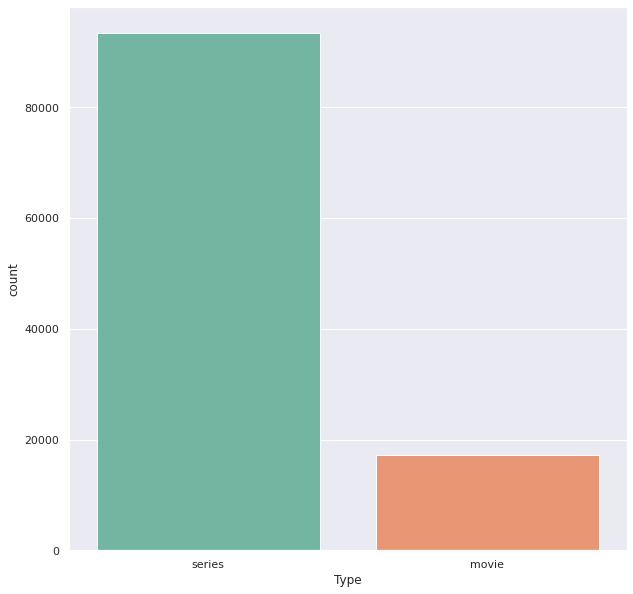

In [51]:
# data type movie and TV count
sns.set(style = 'darkgrid')
ax = sns.countplot(x= 'Type' ,data = df ,palette='Set2')

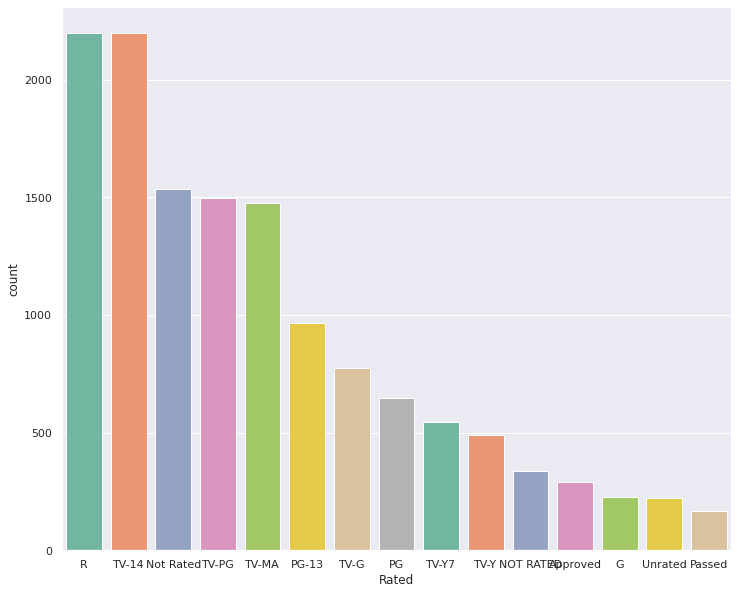

In [52]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="Rated", data=df, palette="Set2", order=df['Rated'].value_counts().index[0:15])

In [ ]:
# 將released 設置為 datetime 將月份以及日期去掉 
df['Released'] = pd.to_datetime(df['Released'])
df['Released'] = df['Released'].dt.strftime('%Y')

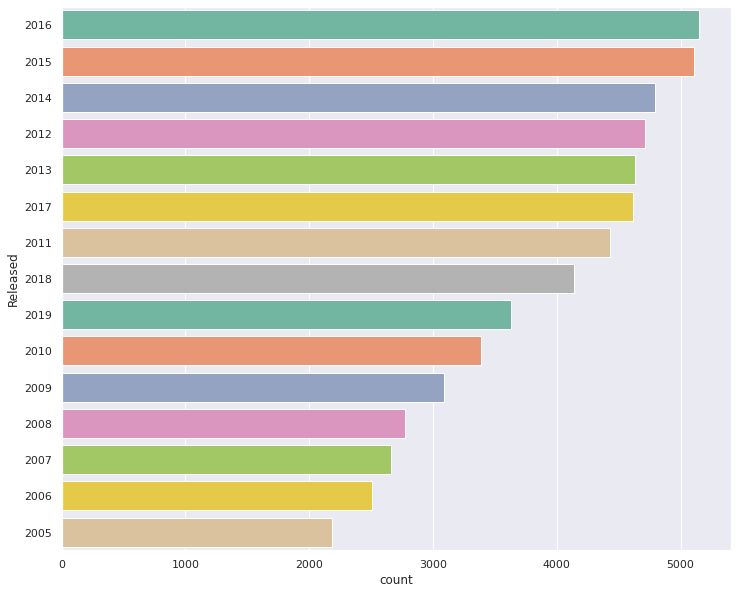

In [61]:
# understand Tv-show every year average porduct .
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="Released", data=df, palette="Set2", order=df['Released'].value_counts().index[0:15])

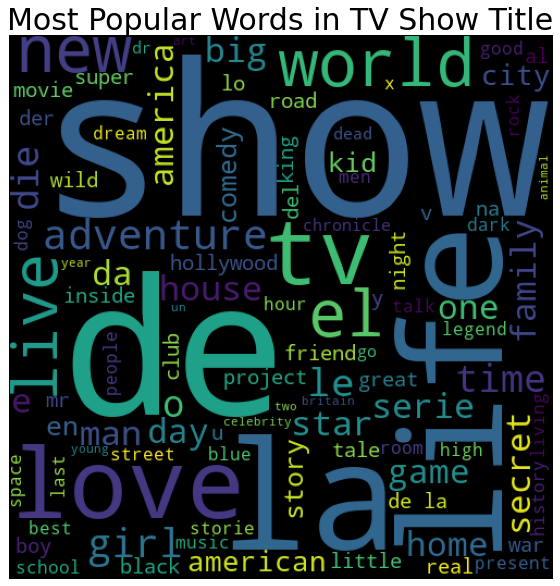

In [12]:


plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color = 'black', width = 500,  height = 500,   max_words = 100).generate(' '.join(df['Title'].str.lower()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in TV Show Title',fontsize = 30)
plt.show()